In [1]:
import pandas as pd #load and manipulate data and for One-hot encoding
import numpy as np #calculate the mean and std. dev
import matplotlib.pyplot as plt #graphs
from sklearn.tree import DecisionTreeClassifier #a class. tree
from sklearn.tree import plot_tree #draw tree
from sklearn.model_selection import train_test_split#split data into train and test sets
from sklearn.model_selection import cross_val_score #cross validation
from sklearn.metrics import confusion_matrix #create matrix
from sklearn.metrics import plot_confusion_matrix #draw matrix

In [2]:
df=pd.read_csv('processed.cleaveland.csv')

In [3]:
#look at the first rows of data
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,59.0,1.0,4.0,170.0,326.0,0.0,2.0,140.0,1.0,3.4,3.0,0,7,2.0
1,46.0,1.0,3.0,150.0,231.0,0.0,0.0,147.0,0.0,3.6,2.0,0,3,1.0
2,65.0,0.0,3.0,155.0,269.0,0.0,0.0,148.0,0.0,0.8,1.0,0,3,0.0
3,67.0,1.0,4.0,125.0,254.0,1.0,0.0,163.0,0.0,0.2,2.0,2,7,3.0
4,62.0,1.0,4.0,120.0,267.0,0.0,0.0,99.0,1.0,1.8,2.0,2,7,1.0


In [4]:
#assessing the different types of data
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd         float64
dtype: object

In [5]:
#investigating what is goign on with a few of the variables (ca, thal)
df['ca'].unique()

array(['0', '2', '1', '3', '?'], dtype=object)

In [6]:
df['thal'].unique()

array(['7', '3', '6', '?'], dtype=object)

In [7]:
#how many rows contain missing data? 
len(df.loc[(df['ca']=='?')|(df['thal']=='?')])

6

In [8]:
#since only 6 rows, let's look at those rows
df.loc[(df['ca']=='?')|(df['thal']=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
19,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0,?,0.0
98,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3,0.0
124,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7,1.0
198,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0,?,2.0
219,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7,0.0
234,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3,0.0


In [9]:
#count how many rows in full dataset
len(df)

235

In [10]:
df_no_missing=df.loc[(df['ca']!='?') 
                    & (df['thal']!='?')]

In [11]:
len(df_no_missing) #verify that df compiled correctly

229

In [12]:
df_no_missing['ca'].unique() #check no missing values

array(['0', '2', '1', '3'], dtype=object)

In [13]:
df_no_missing['thal'].unique() #check no missing values

array(['7', '3', '6'], dtype=object)

In [14]:
X=df_no_missing.drop('hd', axis=1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,59.0,1.0,4.0,170.0,326.0,0.0,2.0,140.0,1.0,3.4,3.0,0,7
1,46.0,1.0,3.0,150.0,231.0,0.0,0.0,147.0,0.0,3.6,2.0,0,3
2,65.0,0.0,3.0,155.0,269.0,0.0,0.0,148.0,0.0,0.8,1.0,0,3
3,67.0,1.0,4.0,125.0,254.0,1.0,0.0,163.0,0.0,0.2,2.0,2,7
4,62.0,1.0,4.0,120.0,267.0,0.0,0.0,99.0,1.0,1.8,2.0,2,7


In [15]:
y=df_no_missing['hd'].copy()
y.head()

0    2.0
1    1.0
2    0.0
3    3.0
4    1.0
Name: hd, dtype: float64

In [16]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [17]:
X['cp'].unique()

array([4., 3., 2., 1.])

In [18]:
# to do one-hot encoding, you can either use get_dummies from pandas or ColumnTransformer() from scikit-learn
#to understand one-hot encoding, get_dummies will be used
pd.get_dummies(X, columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,59.0,1.0,170.0,326.0,0.0,2.0,140.0,1.0,3.4,3.0,0,7,0,0,0,1
1,46.0,1.0,150.0,231.0,0.0,0.0,147.0,0.0,3.6,2.0,0,3,0,0,1,0
2,65.0,0.0,155.0,269.0,0.0,0.0,148.0,0.0,0.8,1.0,0,3,0,0,1,0
3,67.0,1.0,125.0,254.0,1.0,0.0,163.0,0.0,0.2,2.0,2,7,0,0,0,1
4,62.0,1.0,120.0,267.0,0.0,0.0,99.0,1.0,1.8,2.0,2,7,0,0,0,1


In [19]:
X_encoded=pd.get_dummies(X, columns=['cp','restecg','slope','thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3,thal_6,thal_7
0,59.0,1.0,170.0,326.0,0.0,140.0,1.0,3.4,0,0,...,1,0,0,1,0,0,1,0,0,1
1,46.0,1.0,150.0,231.0,0.0,147.0,0.0,3.6,0,0,...,0,1,0,0,0,1,0,1,0,0
2,65.0,0.0,155.0,269.0,0.0,148.0,0.0,0.8,0,0,...,0,1,0,0,1,0,0,1,0,0
3,67.0,1.0,125.0,254.0,1.0,163.0,0.0,0.2,2,0,...,1,1,0,0,0,1,0,0,0,1
4,62.0,1.0,120.0,267.0,0.0,99.0,1.0,1.8,2,0,...,1,1,0,0,0,1,0,0,0,1


In [20]:
y.dropna()

0      2.0
1      1.0
2      0.0
3      3.0
4      1.0
      ... 
229    1.0
230    1.0
231    2.0
232    3.0
233    1.0
Name: hd, Length: 229, dtype: float64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf_dt= DecisionTreeClassifier(random_state=42)
clf_dt=clf_dt.fit(X_train, y_train)

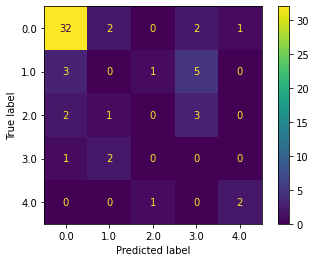

In [22]:
#this is not working plot_confusion_matrix(clf_dt, X_test, y_test)

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf_dt, X_test, y_test)

In [24]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1]

clf_dts = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

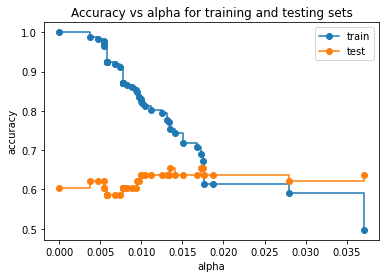

In [25]:
train_scores=[clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores=[clf_dt.score(X_test,y_test) for clf_dt in clf_dts]

fix,ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores,marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores,marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

<AxesSubplot:xlabel='tree'>

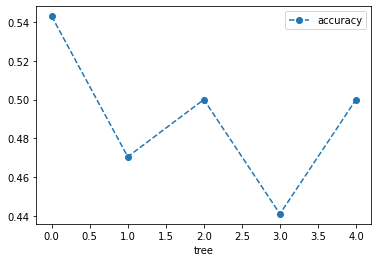

In [26]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

<AxesSubplot:xlabel='alpha'>

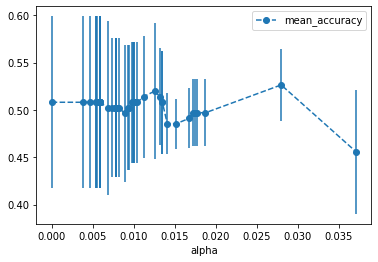

In [27]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values, 
                             columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', 
                   y='mean_accuracy', 
                   yerr='std', 
                   marker='o', 
                   linestyle='--')

In [30]:
alpha_results[(alpha_results['alpha']>0.014)
              & (alpha_results['alpha']<0.015)]

,alpha,mean_accuracy,std
34,0.014091,0.48521,0.032143


In [32]:
ideal_ccp_alpha=alpha_results[(alpha_results['alpha']>0.014)
              & (alpha_results['alpha']<0.015)]['alpha']

ideal_ccp_alpha

34    0.014091
Name: alpha, dtype: float64

In [33]:
ideal_ccp_alpha=float(ideal_ccp_alpha)
ideal_ccp_alpha

0.01409078251183514

In [34]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, 
                                       ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train) 

C:\Users\muher\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (2).

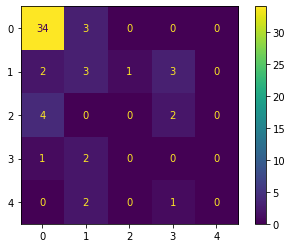

In [35]:
plot_confusion_matrix(clf_dt_pruned, 
                      X_test, 
                      y_test, 
                      display_labels=["Does not have HD", "Has HD"])

IndexError: list index out of range

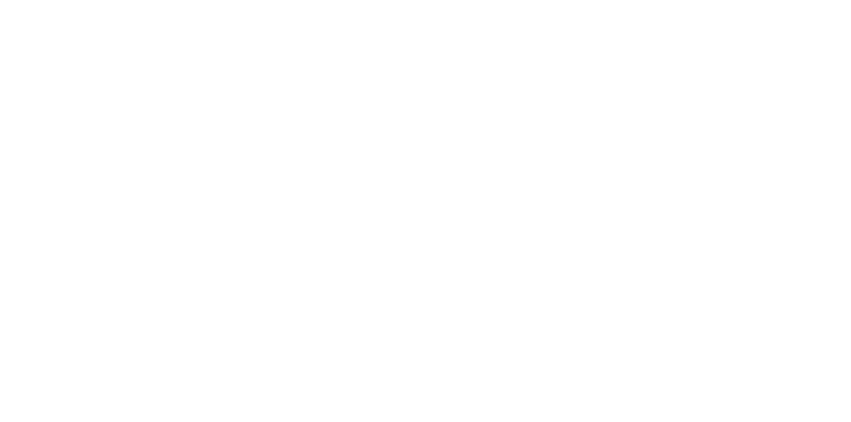

In [36]:
#draw the pruned tree and discuss how to interpret
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned, 
          filled=True, 
          rounded=True, 
          class_names=["No HD", "Yes HD"], 
          feature_names=X.columns) 